In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("project_data.xlsx")
# data exploration
df.head()

,country,year,"GNI per capita, Atlas method (current US$)",Population total,Income Group,Micro(number of employees),Small(number of employees),Medium(number of employees),Large(number of employees),Micro(Number of Enterprises),Small(Number of Enterprises),Medium(Number of Enterprises),SMEs(Number of Enterprises),MSMEs(Number of Enterprises),Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Angola,2016,3450,29784193,Lower middle income,1-9,10-19,>19,NaN,14428.0,7836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,2015,4030,27859305,Lower middle income,1-9,10-19,>19,NaN,2656.0,7222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,2014,4440,26920466,Lower middle income,1-9,10-19,>19,NaN,451.0,24808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,2013,4340,25998340,Lower middle income,1-9,10-19,>19,NaN,2420.0,24201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2011,3390,24218565,Lower middle income,<11,11-100,101-200,>200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["country"].value_counts()

South Africa     7
Nigeria          6
Burundi          6
Cabo Verde       5
Angola           5
Rwanda           3
Uganda           2
Ethiopia         2
Mauritius        2
Botswana         2
Côte d'Ivoire    2
Zimbabwe         2
Benin            1
Ghana            1
Eswatini         1
Mozambique       1
Madagascar       1
Senegal          1
Tanzania         1
Lesotho          1
Mali             1
Gambia, The      1
South Sudan      1
Niger            1
Malawi           1
Gabon            1
Guinea           1
Kenya            1
Sudan            1
Namibia          1
Liberia          1
Togo             1
Burkina Faso     1
Zambia           1
Cameroon         1
Name: country, dtype: int64

In [4]:
ncountries=df["country"].nunique()
ncountries

35

South Africa occurs more frequently and most of the countries occur just once. there are also 35 sub sahara countires in the dataset.

In [5]:
df["year"].value_counts()

2016    10
2012     9
2015     8
2010     7
2011     6
2013     5
2017     4
2014     4
2008     4
2009     3
2005     3
2018     2
2006     1
2004     1
Name: year, dtype: int64

2016 has the highest count and the other years have varying counts from 2012 having 9 to 2004 having 1 count.

In [6]:
df["Income Group"].value_counts()

Low income             29
Lower middle income    25
Upper middle income    13
Name: Income Group, dtype: int64

In [7]:
low_income_countries = df[df["Income Group"] == "Low income"]["country"]
low_income_countries.nunique()

19

In [8]:
Lower_middle_countries = df[df["Income Group"] == "Lower middle income"]["country"]
Lower_middle_countries.nunique()

11

In [9]:
Upper_middle_countries = df[df["Income Group"] == "Upper middle income"]["country"]
Upper_middle_countries.nunique()

5

Of the 35 countires, 19 are labled as "Low income", 11 as "Lower middle income" and 5 as "Upper middle income"

In [10]:
df.drop(df.iloc[:,-5:],inplace=True,axis=1)
df.tail()

,country,year,"GNI per capita, Atlas method (current US$)",Population total,Income Group,Micro(number of employees),Small(number of employees),Medium(number of employees),Large(number of employees),Micro(Number of Enterprises),Small(Number of Enterprises),Medium(Number of Enterprises),SMEs(Number of Enterprises),MSMEs(Number of Enterprises)
62,Uganda,2018,600,42862958,Low income,<5,5-49,50-100,>100,NaN,NaN,NaN,NaN,NaN
63,Uganda,2006,340,29550662,Low income,1-9,10-49,50-99,>99,19270.0,5485.0,378.0,5863.0,25133.0
64,Zambia,2014,1770,15620974,Lower middle income,<11,11-50,51-100,>100,NaN,NaN,NaN,NaN,NaN
65,Zimbabwe,2018,910,16529904,Low income,1-9,10-40,41-75,>75,NaN,NaN,NaN,NaN,NaN
66,Zimbabwe,2012,810,14710826,Low income,1-5,"6-30 Agriculture, Arts, Entertainment, Culture...","31- 75 Agriculture, Arts, Entertainment, Cultu...",">75 Agriculture, Arts, Entertainment, Culture,...",654224.0,108286.0,19278.0,127564.0,781788.0


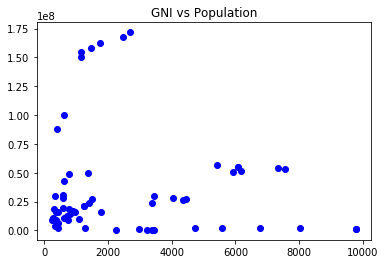

In [11]:
# Relationship between GNI and Populaform
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,2],df.iloc[:,3],c ="blue") 
plt.title("GNI vs Population")
plt.show()

In [12]:
gni_popu_corr = df.corr()
gni_popu_corr

,year,"GNI per capita, Atlas method (current US$)",Population total,Micro(Number of Enterprises),Small(Number of Enterprises),Medium(Number of Enterprises),SMEs(Number of Enterprises),MSMEs(Number of Enterprises)
year,1.000000,0.046938,-0.102371,0.171167,0.172573,0.225726,0.184788,0.183084
"GNI per capita, Atlas method (current US$)",0.046938,1.000000,-0.035914,-0.095928,-0.102512,-0.071035,-0.079122,-0.069562
Population total,-0.102371,-0.035914,1.000000,0.057359,-0.017986,0.014847,-0.014740,0.032137
Micro(Number of Enterprises),0.171167,-0.095928,0.057359,1.000000,0.995648,0.972052,0.995489,0.999943
Small(Number of Enterprises),0.172573,-0.102512,-0.017986,0.995648,1.000000,0.980281,0.999979,0.996572
Medium(Number of Enterprises),0.225726,-0.071035,0.014847,0.972052,0.980281,1.000000,0.981536,0.973606
SMEs(Number of Enterprises),0.184788,-0.079122,-0.014740,0.995489,0.999979,0.981536,1.000000,0.996443
MSMEs(Number of Enterprises),0.183084,-0.069562,0.032137,0.999943,0.996572,0.973606,0.996443,1.000000


GNI(Gross Natioanl income) per capita And the countries population doesn't seem to have a strong relationship 

### PREPARING THE DATA TO FEED THEM INTO MACHINE LEARNING ALGORITHMS

In [32]:
# Converting to a time series data by taking average across all the years.
transformed = df.groupby("year",as_index=False).mean()

In [33]:
transformed

,year,"GNI per capita, Atlas method (current US$)",Population total,Micro(Number of Enterprises),Small(Number of Enterprises),Medium(Number of Enterprises),SMEs(Number of Enterprises),MSMEs(Number of Enterprises)
0,2004,360.000000,9.379621e+06,NaN,NaN,NaN,NaN,NaN
1,2005,2970.000000,1.705960e+07,2.035810e+05,NaN,NaN,1.126567e+04,2.109180e+05
2,2006,340.000000,2.955066e+07,1.927000e+04,5.485000e+03,378.000000,5.863000e+03,2.513300e+04
3,2008,2762.500000,5.248704e+07,5.310500e+03,5.908600e+04,8212.000000,6.729800e+04,7.260850e+04
4,2009,1666.666667,5.374321e+07,7.324000e+03,6.830000e+02,275.000000,9.580000e+02,8.282000e+03
5,2010,2467.142857,4.669343e+07,7.043500e+03,6.170000e+02,283.000000,9.000000e+02,6.414333e+04
6,2011,1621.666667,3.520558e+07,4.092267e+04,2.761667e+03,332.000000,3.093667e+03,4.401633e+04
7,2012,2017.777778,3.920639e+07,9.353200e+05,3.639567e+04,5656.000000,5.429900e+04,8.263533e+05
8,2013,4890.000000,5.249078e+07,9.285242e+06,3.115550e+04,2046.333333,3.552000e+04,1.241504e+07
9,2014,1800.000000,1.594465e+07,4.801233e+04,1.198000e+04,495.500000,6.061500e+03,7.785450e+04


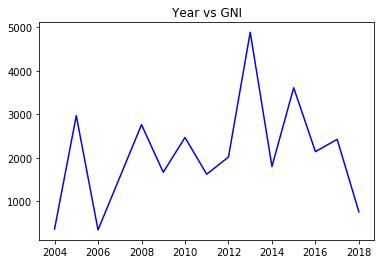

In [34]:
plt.plot(transformed["year"],transformed["GNI per capita, Atlas method (current US$)"],c ="blue") 
plt.title("Year vs GNI")
plt.show()

In [35]:
# fill missing values with mean
transformed = transformed.fillna(transformed.mean())

In [36]:
transformed

,year,"GNI per capita, Atlas method (current US$)",Population total,Micro(Number of Enterprises),Small(Number of Enterprises),Medium(Number of Enterprises),SMEs(Number of Enterprises),MSMEs(Number of Enterprises)
0,2004,360.000000,9.379621e+06,5.711010e+06,6.870272e+05,40886.662424,7.720079e+05,7.529414e+06
1,2005,2970.000000,1.705960e+07,2.035810e+05,6.870272e+05,40886.662424,1.126567e+04,2.109180e+05
2,2006,340.000000,2.955066e+07,1.927000e+04,5.485000e+03,378.000000,5.863000e+03,2.513300e+04
3,2008,2762.500000,5.248704e+07,5.310500e+03,5.908600e+04,8212.000000,6.729800e+04,7.260850e+04
4,2009,1666.666667,5.374321e+07,7.324000e+03,6.830000e+02,275.000000,9.580000e+02,8.282000e+03
5,2010,2467.142857,4.669343e+07,7.043500e+03,6.170000e+02,283.000000,9.000000e+02,6.414333e+04
6,2011,1621.666667,3.520558e+07,4.092267e+04,2.761667e+03,332.000000,3.093667e+03,4.401633e+04
7,2012,2017.777778,3.920639e+07,9.353200e+05,3.639567e+04,5656.000000,5.429900e+04,8.263533e+05
8,2013,4890.000000,5.249078e+07,9.285242e+06,3.115550e+04,2046.333333,3.552000e+04,1.241504e+07
9,2014,1800.000000,1.594465e+07,4.801233e+04,1.198000e+04,495.500000,6.061500e+03,7.785450e+04


In [50]:
# splitting training data to train set and test set
from sklearn.model_selection import train_test_split
X = transformed.iloc[:,2:]
y = transformed.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### TRAINING A MODEL

In [51]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#To retrieve the intercept:
print(lg.intercept_)

#For retrieving the slope:
print(lg.coef_)

549.6378327077223
[ 3.27156836e-05  1.63497790e-03  3.10730935e-03 -5.24506454e-03
  7.07002210e-03 -2.29309249e-03]


In [53]:
y_pred = lg.predict(X_test)

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,4890.000000,-10683.547101
6,1621.666667,1696.098723
4,1666.666667,2308.319702


In [59]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5429.8773973066045
Mean Squared Error: 80984209.347276
Root Mean Squared Error: 8999.122698756584
